In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np

# pomiary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statistics import mean

# algorytmy
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# wykresy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get data
data = pd.read_csv('..\\diabetes.csv')

# preprocess data
data.tail(10)
features = data.drop(["Outcome"], axis=1)
target = data["Outcome"]

# lda algotithn
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
print("Początkowa liczba cech:", features.shape[1])
print("Liczba cech po redukcji:", features_lda.shape[1])
print(features)
print(features_lda[:3])

Początkowa liczba cech: 8
Liczba cech po redukcji: 1
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                    

In [3]:
tries = 10
log_reg_accuracy = []
x = features
y = target
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(features, target)

    l_reg = LogisticRegression(solver='lbfgs', max_iter=250)
    l_reg.fit(X_train, y_train)
    y_pred = l_reg.predict(X_test)  # przewidujemy na podstawie X_test
    log_reg_accuracy.append(accuracy_score(y_test, y_pred) * 100.0)


In [4]:
# jądro svc
svc_linear_accuracy = []
svc = svm.SVC(kernel="linear", C=0.4)
for i in range(tries):
    svc.fit(x, y)
    y_pred = svc.predict(x)
    svc_linear_accuracy.append(accuracy_score(y_pred, y) * 100.0)

svc_rbf_accuracy = []
svc = svm.SVC(kernel="rbf", C=0.4)
for i in range(tries):
    svc.fit(x, y)
    y_pred = svc.predict(x)
    svc_rbf_accuracy.append(accuracy_score(y_pred, y) * 100.0)


In [5]:
# k najbliższych sąsiadów

knn_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)
    knn_accuracy.append(neigh.score(X_test,y_test) * 100.0)


Mean accuracies:
Logistic regression:  77.5
Linear kernel:  77.34375
RBF kernel 75.91145833333334
KNN Accuracy:  73.59375


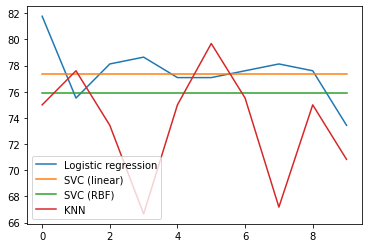

In [6]:

print("Mean accuracies:" )
print("Logistic regression: ", mean(log_reg_accuracy))
print("Linear kernel: ", mean(svc_linear_accuracy))
print("RBF kernel", mean(svc_rbf_accuracy))
print("KNN Accuracy: ", mean(knn_accuracy))
ax_log_reg = plt.plot(list(range(tries)), log_reg_accuracy, label="Logistic regression")
ax_svc_linear = plt.plot(list(range(tries)), svc_linear_accuracy, label="SVC (linear)")
ax_svc_rbf = plt.plot(list(range(tries)), svc_rbf_accuracy, label="SVC (RBF)")
ax_svc_knn = plt.plot(list(range(tries)), knn_accuracy, label="KNN")
plt.legend()
plt.show()